## PRAKTIKUM PENGOLAHAN CITRA BIOMEDIKA PERTEMUAN KE-2

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/PRAK PENGOLAHAN CITRA/

/content/drive/MyDrive/PRAK PENGOLAHAN CITRA


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import random

Text(0.5, 1.0, 'Gaussian Noise Image')

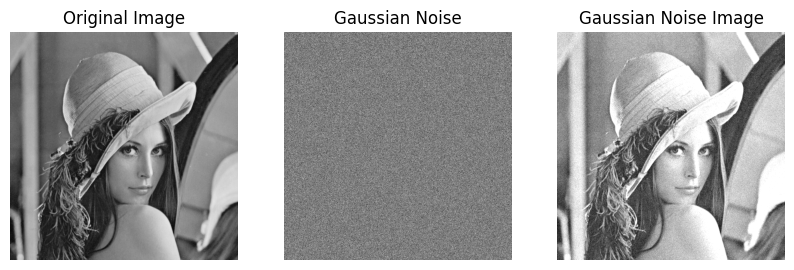

In [ ]:
img = cv2.imread('Lenna.jpg', cv2.IMREAD_GRAYSCALE)

gauss_noise=np.zeros((512,512), dtype=np.uint8)
cv2.randn(gauss_noise,128,20)
gauss_noise=(gauss_noise*0.5).astype(np.uint8)
gn_img=cv2.add(img,gauss_noise)

rows = 1
columns = 3
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(rows, columns, 1)
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.title('Original Image')

fig.add_subplot(rows, columns, 2)
plt.imshow(gauss_noise, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.title('Gaussian Noise')

fig.add_subplot(rows, columns, 3)
plt.imshow(gn_img, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.title('Gaussian Noise Image')

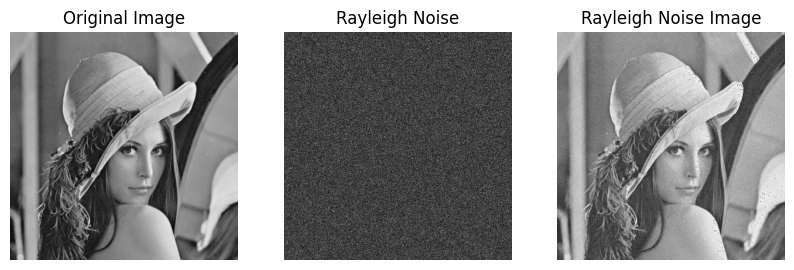

In [ ]:
image = np.float64(img)
noise_std = 0.2
noise = np.random.rayleigh(noise_std, img.shape)
noisy_image = cv2.addWeighted(image, 1, noise, 70, 0.0).astype(np.uint8)

rows = 1
columns = 3
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(rows, columns, 1)
plt.axis('off')
plt.title('Original Image')
plt.imshow(img, cmap=plt.get_cmap('gray'))

fig.add_subplot(rows, columns, 2)
plt.axis('off')
plt.title('Rayleigh Noise')
plt.imshow(noise, cmap=plt.get_cmap('gray'))

fig.add_subplot(rows, columns, 3)
plt.axis('off')
plt.title('Rayleigh Noise Image')
plt.imshow(noisy_image, cmap=plt.get_cmap('gray'))

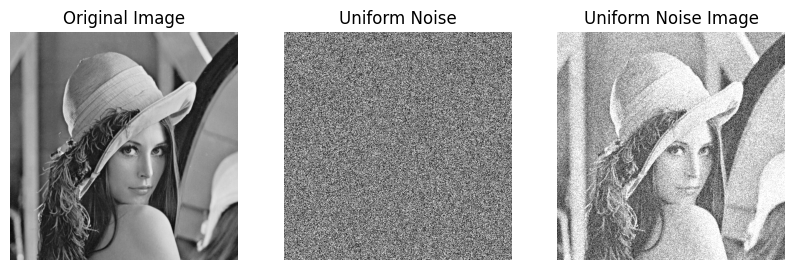

In [ ]:
image = np.float64(img)
uni_noise=np.zeros((512,512),dtype=np.uint8)
cv2.randu(uni_noise,0,255)
uni_noise=(uni_noise*0.5).astype(np.uint8)
un_img=cv2.add(img,uni_noise)

rows = 1
columns = 3
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(rows, columns, 1)
plt.axis('off')
plt.title('Original Image')
plt.imshow(img, cmap=plt.get_cmap('gray'))

fig.add_subplot(rows, columns, 2)
plt.axis('off')
plt.title('Uniform Noise')
plt.imshow(uni_noise, cmap=plt.get_cmap('gray'))

fig.add_subplot(rows, columns, 3)
plt.axis('off')
plt.title('Uniform Noise Image')
plt.imshow(un_img, cmap=plt.get_cmap('gray'))

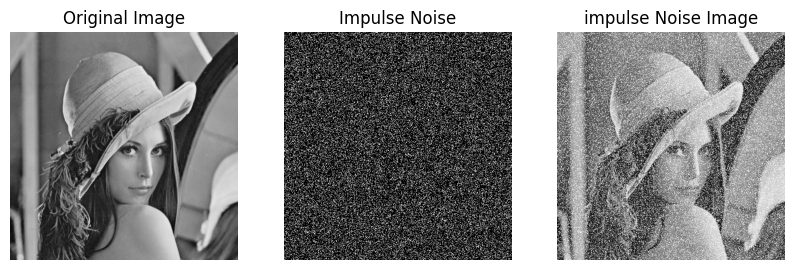

In [ ]:
imp_noise=np.zeros((512,512),dtype=np.uint8)
cv2.randu(imp_noise,0,255)
imp_noise=cv2.threshold(imp_noise,200,255,cv2.THRESH_BINARY)[1]

in_img=cv2.add(img,imp_noise)

rows = 1
columns = 3
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(rows, columns, 1)
plt.axis('off')
plt.title('Original Image')
plt.imshow(img, cmap=plt.get_cmap('gray'))

fig.add_subplot(rows, columns, 2)
plt.axis('off')
plt.title('Impulse Noise')
plt.imshow(imp_noise, cmap=plt.get_cmap('gray'))

fig.add_subplot(rows, columns, 3)
plt.axis('off')
plt.title('impulse Noise Image')
plt.imshow(in_img, cmap=plt.get_cmap('gray'))

In [ ]:
example_image = np.array(([[5, 1, 0, 5, 7],
                   [0, 3, 0, 1, 4],
                   [4, 1, 6, 1, 6],
                   [3, 7, 2, 3, 0],
                   [3, 3, 4, 6, 7]]),dtype=np.uint8)

example_kernel = np.ones((3,3),np.float32)/9

colvolved_matrix = cv2.filter2D(example_image,-1,example_kernel)
colvolved_matrix

array([[2, 1, 2, 2, 3],
       [2, 2, 2, 3, 3],
       [3, 3, 3, 3, 2],
       [4, 4, 4, 4, 4],
       [5, 4, 4, 3, 3]], dtype=uint8)

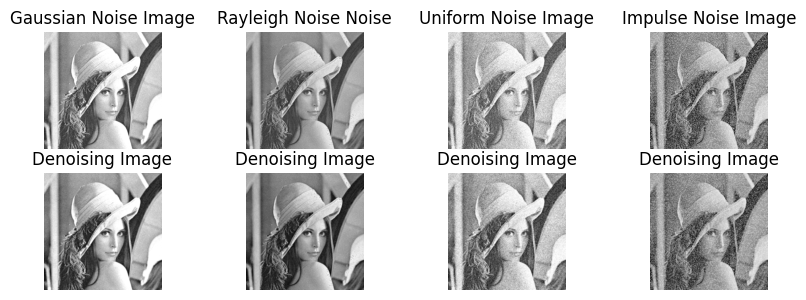

In [ ]:
kernel = np.ones((3,3),np.float32)/9
meanfilt_gn = cv2.filter2D(gn_img,-1,kernel)
meanfilt_rl = cv2.filter2D(noisy_image,-1,kernel)
meanfilt_un = cv2.filter2D(un_img,-1,kernel)
meanfilt_in = cv2.filter2D(in_img,-1,kernel)

rows = 4
columns = 4
fig = plt.figure(figsize=(10, 7))

fig.add_subplot(rows, columns, 1)
plt.axis('off')
plt.title('Gaussian Noise Image')
plt.imshow(gn_img, cmap=plt.get_cmap('gray'))

fig.add_subplot(rows, columns, 2)
plt.axis('off')
plt.title('Rayleigh Noise Noise')
plt.imshow(noisy_image, cmap=plt.get_cmap('gray'))

fig.add_subplot(rows, columns, 3)
plt.axis('off')
plt.title('Uniform Noise Image')
plt.imshow(un_img, cmap=plt.get_cmap('gray'))

fig.add_subplot(rows, columns, 4)
plt.axis('off')
plt.title('Impulse Noise Image')
plt.imshow(in_img, cmap=plt.get_cmap('gray'))

fig.add_subplot(rows, columns, 5)
plt.axis('off')
plt.title('Denoising Image')
plt.imshow(meanfilt_gn, cmap=plt.get_cmap('gray'))

fig.add_subplot(rows, columns, 6)
plt.axis('off')
plt.title('Denoising Image')
plt.imshow(meanfilt_rl, cmap=plt.get_cmap('gray'))

fig.add_subplot(rows, columns, 7)
plt.axis('off')
plt.title('Denoising Image')
plt.imshow(meanfilt_un, cmap=plt.get_cmap('gray'))

fig.add_subplot(rows, columns, 8)
plt.axis('off')
plt.title('Denoising Image')
plt.imshow(meanfilt_in, cmap=plt.get_cmap('gray'))

In [ ]:
example_image = np.array(([[5, 1, 0, 5, 7],
                   [0, 3, 0, 1, 4],
                   [4, 1, 6, 1, 6],
                   [3, 7, 2, 3, 0],
                   [3, 3, 4, 6, 7]]),dtype=np.uint8)

median = cv2.medianBlur(example_image,3)
median

array([[3, 1, 1, 4, 5],
       [3, 1, 1, 4, 5],
       [3, 3, 2, 2, 3],
       [3, 3, 3, 4, 6],
       [3, 3, 4, 4, 6]], dtype=uint8)

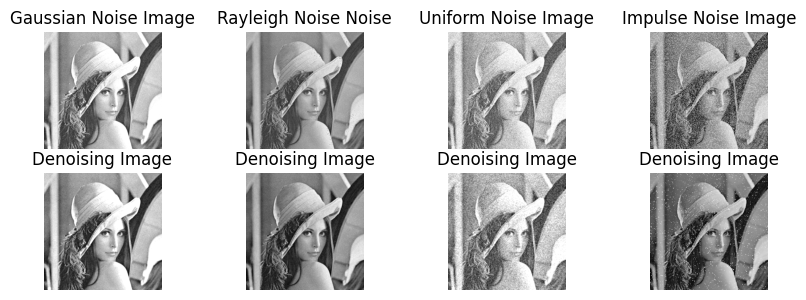

In [ ]:
medfilt_gn = cv2.medianBlur(gn_img,3)
medfilt_rl = cv2.medianBlur(noisy_image,3)
medfilt_un = cv2.medianBlur(un_img,3)
medfilt_in = cv2.medianBlur(in_img,3)

rows = 4
columns = 4
fig = plt.figure(figsize=(10, 7))

fig.add_subplot(rows, columns, 1)
plt.axis('off')
plt.title('Gaussian Noise Image')
plt.imshow(gn_img, cmap=plt.get_cmap('gray'))

fig.add_subplot(rows, columns, 2)
plt.axis('off')
plt.title('Rayleigh Noise Noise')
plt.imshow(noisy_image, cmap=plt.get_cmap('gray'))

fig.add_subplot(rows, columns, 3)
plt.axis('off')
plt.title('Uniform Noise Image')
plt.imshow(un_img, cmap=plt.get_cmap('gray'))

fig.add_subplot(rows, columns, 4)
plt.axis('off')
plt.title('Impulse Noise Image')
plt.imshow(in_img, cmap=plt.get_cmap('gray'))

fig.add_subplot(rows, columns, 5)
plt.axis('off')
plt.title('Denoising Image')
plt.imshow(medfilt_gn, cmap=plt.get_cmap('gray'))

fig.add_subplot(rows, columns, 6)
plt.axis('off')
plt.title('Denoising Image')
plt.imshow(medfilt_rl, cmap=plt.get_cmap('gray'))

fig.add_subplot(rows, columns, 7)
plt.axis('off')
plt.title('Denoising Image')
plt.imshow(medfilt_un, cmap=plt.get_cmap('gray'))

fig.add_subplot(rows, columns, 8)
plt.axis('off')
plt.title('Denoising Image')
plt.imshow(medfilt_in, cmap=plt.get_cmap('gray'))